# Mini Projeto - Pandas

##Carregamento e visualização inicial

In [32]:
import pandas as pd #Importando Pandas
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('/content/train.csv') #Lendo arquivo csv
df.head() #Primeira 5 linhas

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Limpeza de dados

In [34]:
df = df.drop(['Cabin', 'Ticket'], axis=1) #Removendo colunas que não serão utilizadas

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True) #Preenchendo valores nulos na coluna Age com a média de idade

In [36]:
df['Embarked'].value_counts() #Descobrindo os valores com maior frequência

,count
Embarked,
S,644
C,168
Q,77


In [37]:
df['Embarked'] = 'S' #Substituindo pelo valor descoberto 'S'

In [38]:
df.rename(columns={'Sex': 'Sexo', 'Pclass': 'Classe'}, inplace=True) #Renomeando colunas

##Análise de Sobrevivência

In [39]:
df['Survived'].value_counts()
#De acordo com o dicionário de dados - 1 são os sobreviventes e 0 são os não sobreviventes
#Logo, são 342 sobreviventes e 549 Mortos

,count
Survived,
0,549
1,342


In [40]:
#sobreviventes por classe e sexo
df[['Sexo', 'Classe', 'Survived']].value_counts()

Sexo    Classe  Survived
male    3       0           300
female  1       1            91
male    2       0            91
        1       0            77
female  3       1            72
                0            72
        2       1            70
male    3       1            47
        1       1            45
        2       1            17
female  2       0             6
        1       0             3
Name: count, dtype: int64

In [41]:
#idade média dos sobreviventes x não sobreviventes
df.groupby('Survived')['Age'].mean()

,Age
Survived,
0,30.415100
1,28.549778


##Gráficos

###Gráfico de barras: Sobreviventes por classe

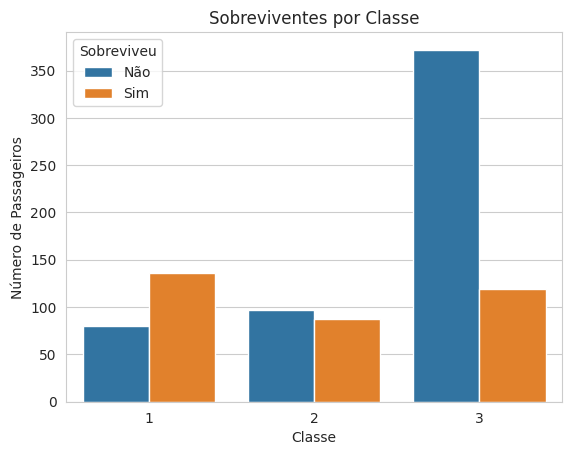

In [42]:
sns.countplot(x='Classe', hue='Survived', data=df) #Gráfico de barras utilizando o countplot

plt.title('Sobreviventes por Classe')
plt.xlabel('Classe')
plt.ylabel('Número de Passageiros')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()

###Gráfico de Pizza: Porcentagem de sobreviventes por sexo

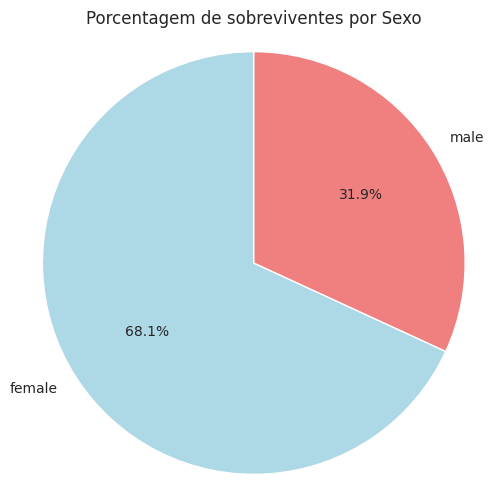

In [43]:
sobreviventes = df[df['Survived']==1]

contador_sexo = sobreviventes['Sexo'].value_counts()


plt.figure(figsize=(6,6))
plt.pie(contador_sexo, labels=contador_sexo.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Porcentagem de sobreviventes por Sexo')
plt.axis('equal')
plt.show()

###Gráfico de Histograma: Distribuição de idade

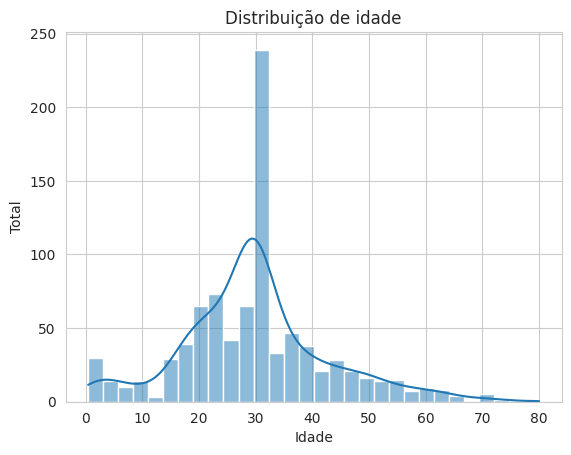

In [24]:
sns.histplot(data = df, x='Age', kde=True) #kde=True mostra a curva de densidade
plt.title('Distribuição de idade')
plt.xlabel('Idade')
plt.ylabel('Total')
plt.show()

##Função de Resumo por Grupo

In [56]:
def resumo_por_grupo(coluna):
  if coluna == 'Sexo':
    return sobreviventes.groupby('Sexo')['Age'].mean().round(0)
  elif coluna == 'Classe':
    return sobreviventes.groupby('Classe')['Age'].mean().round(0)
  else:
    return print('Coluna Não identificada. Digite a coluna certa')

resumo_por_grupo('Classe')


,Age
Classe,
1,35.0
2,26.0
3,23.0


##Análise final

**Sobreviventes por classe**

A análise através do gráfico de barras mostrou que durante o ocorrido, o número de mortes de homens da classe mais baixa (terceira classe) foi mais elevada em relação às demais classes.

O número de mulheres da primeira classe mortos são maiores do que das demais classes.


**Sobreviventes por Sexo**

A análise através do gráfico de pizza mostrou que a porcentagem de mulheres sobreviventes é significativamente maior do que homens. Mais do que o dobro de diferença.

**Distribuição de idades**

O histograma de distribuição de idade mostrou que a maioria esmagadora dos integrantes do titanic eram pessoas na faixa dos 30 anos.

**Resumo por grupo**

Através da função de resumo por grupo, temos que a média de idade dos sobreviventes homens x mulheres é:


*   Homens: 28 anos
*   Mulheres: 29 anos


E a média de idade dos sobreviventes de acordo com cada classe é:

*   Primeira Classe - 35 anos
*   Segunda Classe - 26 anos
*   Terceira Classe - 23 anos




